# Умножение матриц

In [1]:
import warnings
warnings.simplefilter('ignore')

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn

params = {
    'legend.fontsize': 20,
    'axes.labelsize': 20,
    'axes.titlesize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20
}
pylab.rcParams.update(params)

import pandas as pd
import numpy as np

%matplotlib inline

На нашей машине имеется L1 кэш для данных и инструкций для каждого ядра, и L2 и L3 кэши.

| N              | size (KB) | ways of associativity | line  size (B) | number of sets |
|----------------|-----------|-----------------------|----------------|----------------|
| L1 data        | 32        | 8                     | 64             | 64             |
| L1 instruction | 32        | 8                     | 64             | 64             |
| L2             | 256       | 8                     | 64             | 4096           |
| L3             | 3072      | 12                    |                |                |

$critical\_stride = number\_of\_sets \times line\_size = 64 \times 64 = 4096\ B$ 

In [2]:
!grep . /sys/devices/system/cpu/cpu0/cache/index*/*

/sys/devices/system/cpu/cpu0/cache/index0/coherency_line_size:64
/sys/devices/system/cpu/cpu0/cache/index0/id:0
/sys/devices/system/cpu/cpu0/cache/index0/level:1
/sys/devices/system/cpu/cpu0/cache/index0/number_of_sets:64
/sys/devices/system/cpu/cpu0/cache/index0/physical_line_partition:1
grep: /sys/devices/system/cpu/cpu0/cache/index0/power: Is a directory
/sys/devices/system/cpu/cpu0/cache/index0/shared_cpu_list:0-1
/sys/devices/system/cpu/cpu0/cache/index0/shared_cpu_map:03
/sys/devices/system/cpu/cpu0/cache/index0/size:32K
/sys/devices/system/cpu/cpu0/cache/index0/type:Data
/sys/devices/system/cpu/cpu0/cache/index0/ways_of_associativity:8
/sys/devices/system/cpu/cpu0/cache/index1/coherency_line_size:64
/sys/devices/system/cpu/cpu0/cache/index1/id:0
/sys/devices/system/cpu/cpu0/cache/index1/level:1
/sys/devices/system/cpu/cpu0/cache/index1/number_of_sets:64
/sys/devices/system/cpu/cpu0/cache/index1/physical_line_partition:1
grep: /sys/devices/system/cpu/cpu0/cache/index1/power: Is a

## FLOAT

In [3]:
df_float = pd.read_csv('result1.csv', sep=';', header=None)
df_float.columns = ['N', 'Simple', 'Block', 'Swapped']
df_float.set_index('N', inplace=True)
df_float.head()

,Simple,Block,Swapped
N,,,
1000,1.72840,1.48813,0.778102
1001,2.89788,1.64348,0.764704
1002,2.12263,1.60359,0.767570
1003,2.81566,1.55550,0.778005
1004,1.91176,1.56713,0.792450


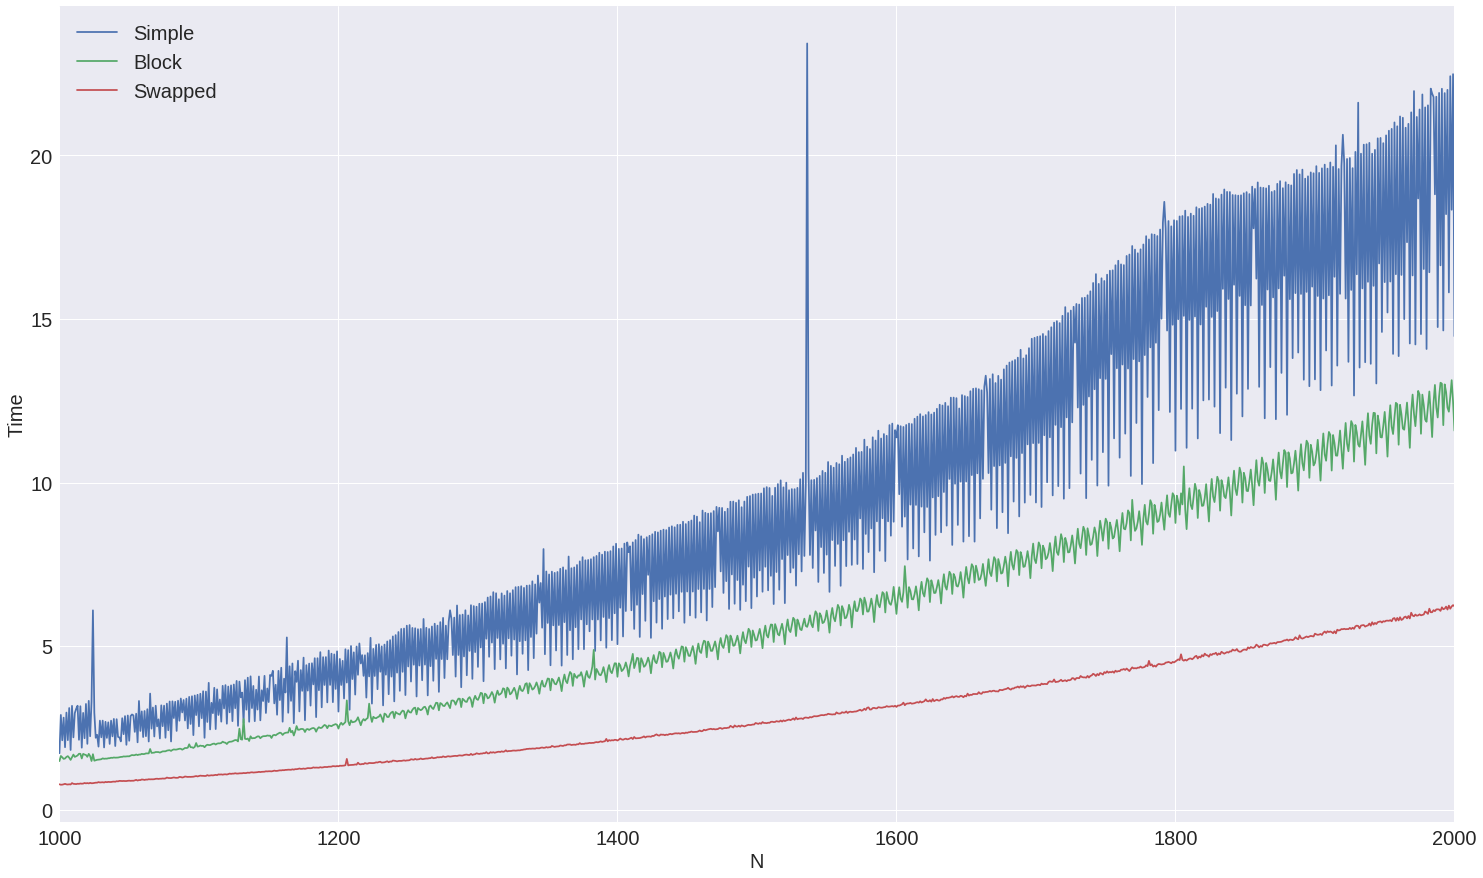

In [5]:
_, ax = plt.subplots(figsize=(25, 15))
df_float.plot(ax=ax)
ax.set_xlabel('N')
ax.set_ylabel('Time')

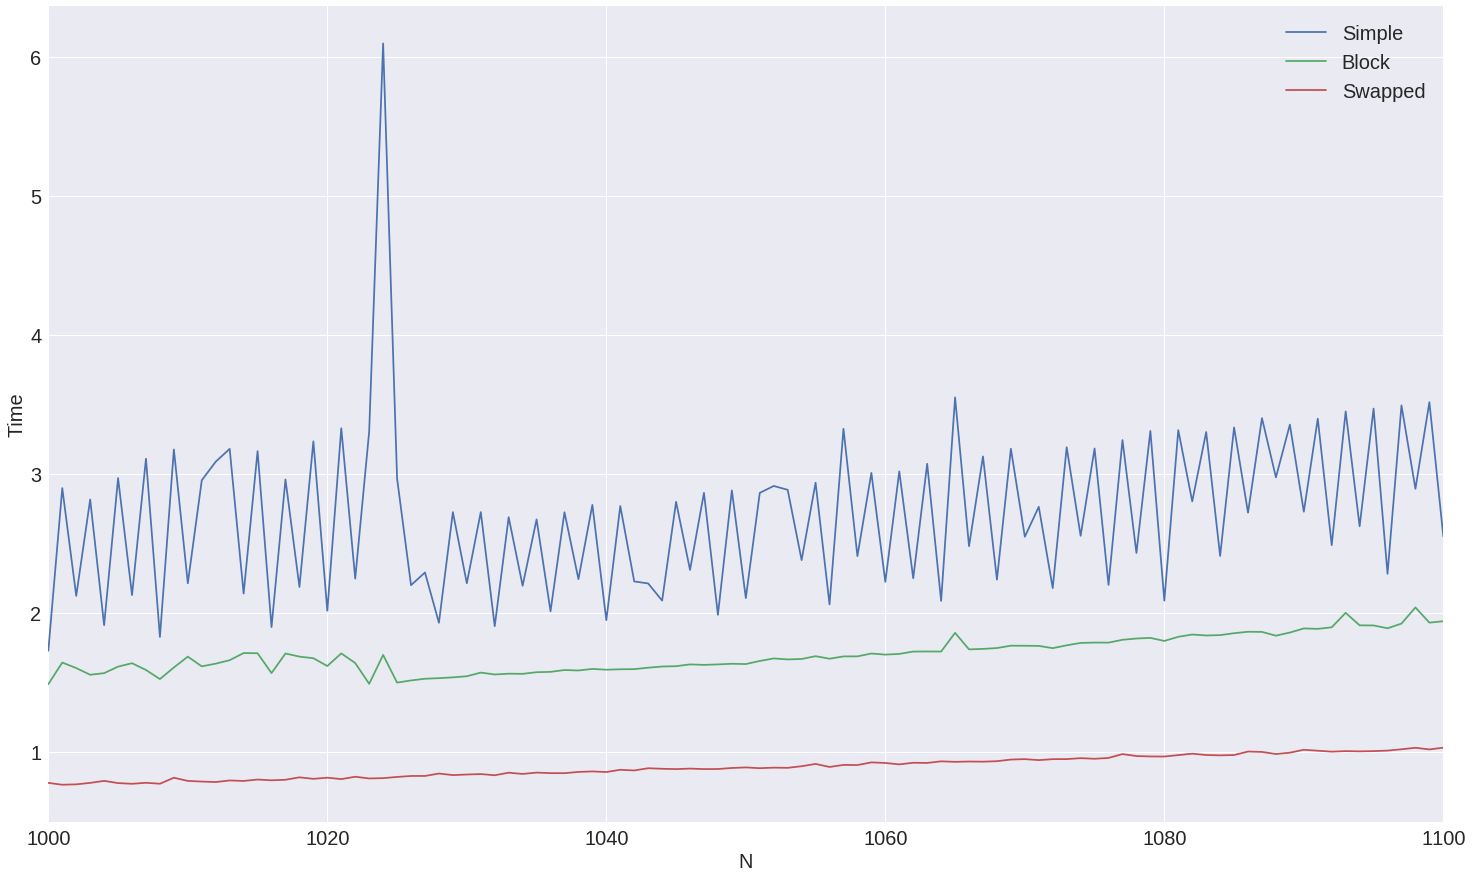

In [6]:
_, ax = plt.subplots(figsize=(25, 15))
df_float[:101].plot(ax=ax)
ax.set_xlabel('N')
ax.set_ylabel('Time')

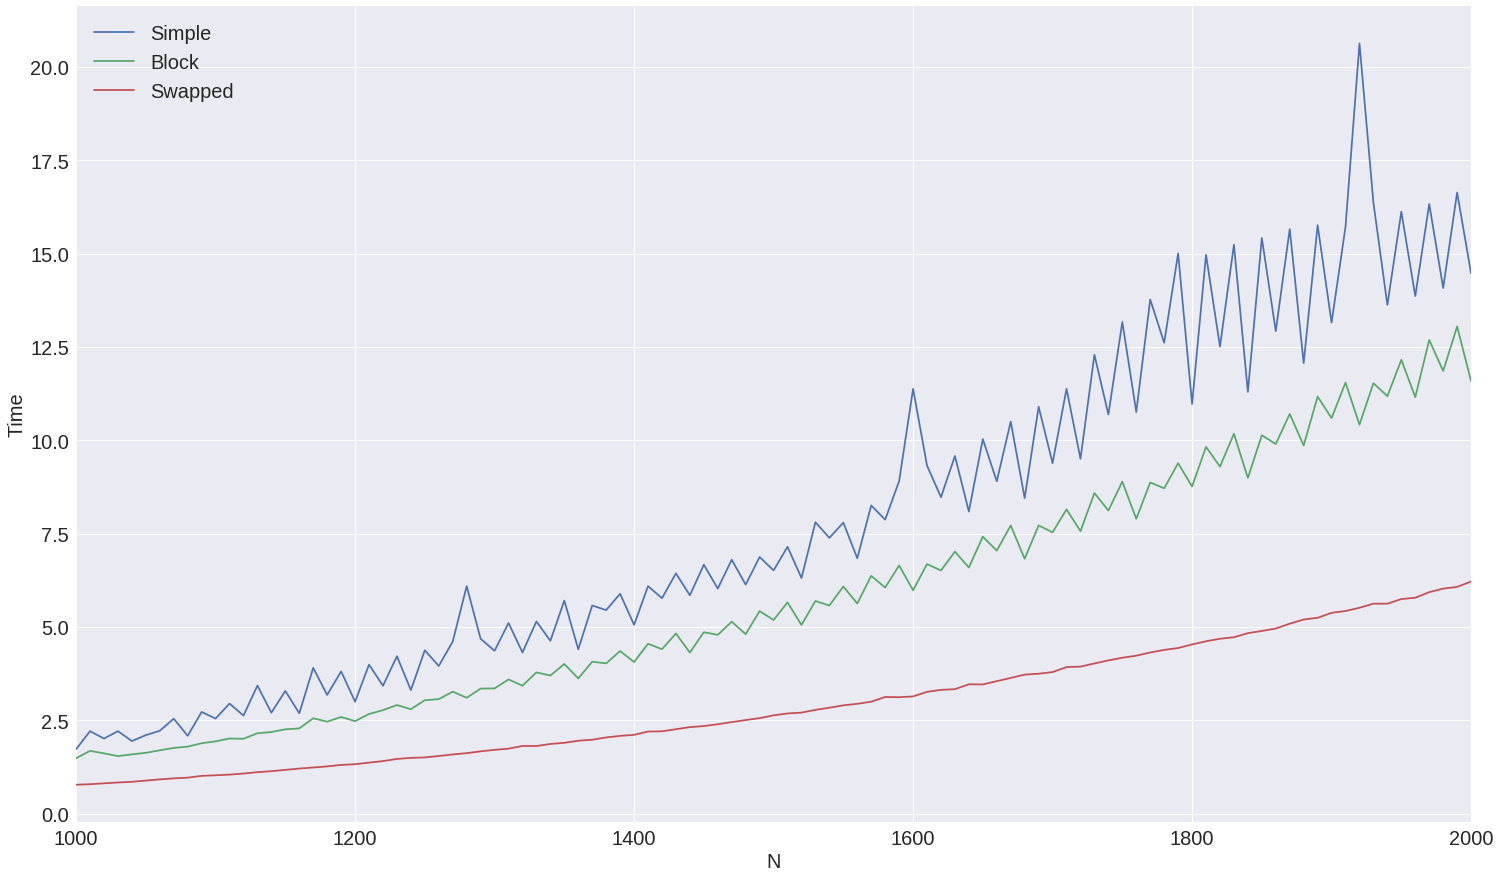

In [7]:
_, ax = plt.subplots(figsize=(25, 15))
df_float[::10].plot(ax=ax)
ax.set_xlabel('N')
ax.set_ylabel('Time')

## DOUBLE

In [10]:
df_double = pd.read_csv('result2.csv', sep=';', header=None)
df_double.columns = ['N', 'Simple', 'Block', 'Swapped']
df_double.set_index('N', inplace=True)
df_double.head()

,Simple,Block,Swapped
N,,,
1000,2.86602,1.74967,1.10771
1001,3.42957,1.81381,1.07668
1002,2.90208,1.86037,1.09741
1003,3.41126,1.77468,1.09265
1004,2.66606,1.69303,1.08757


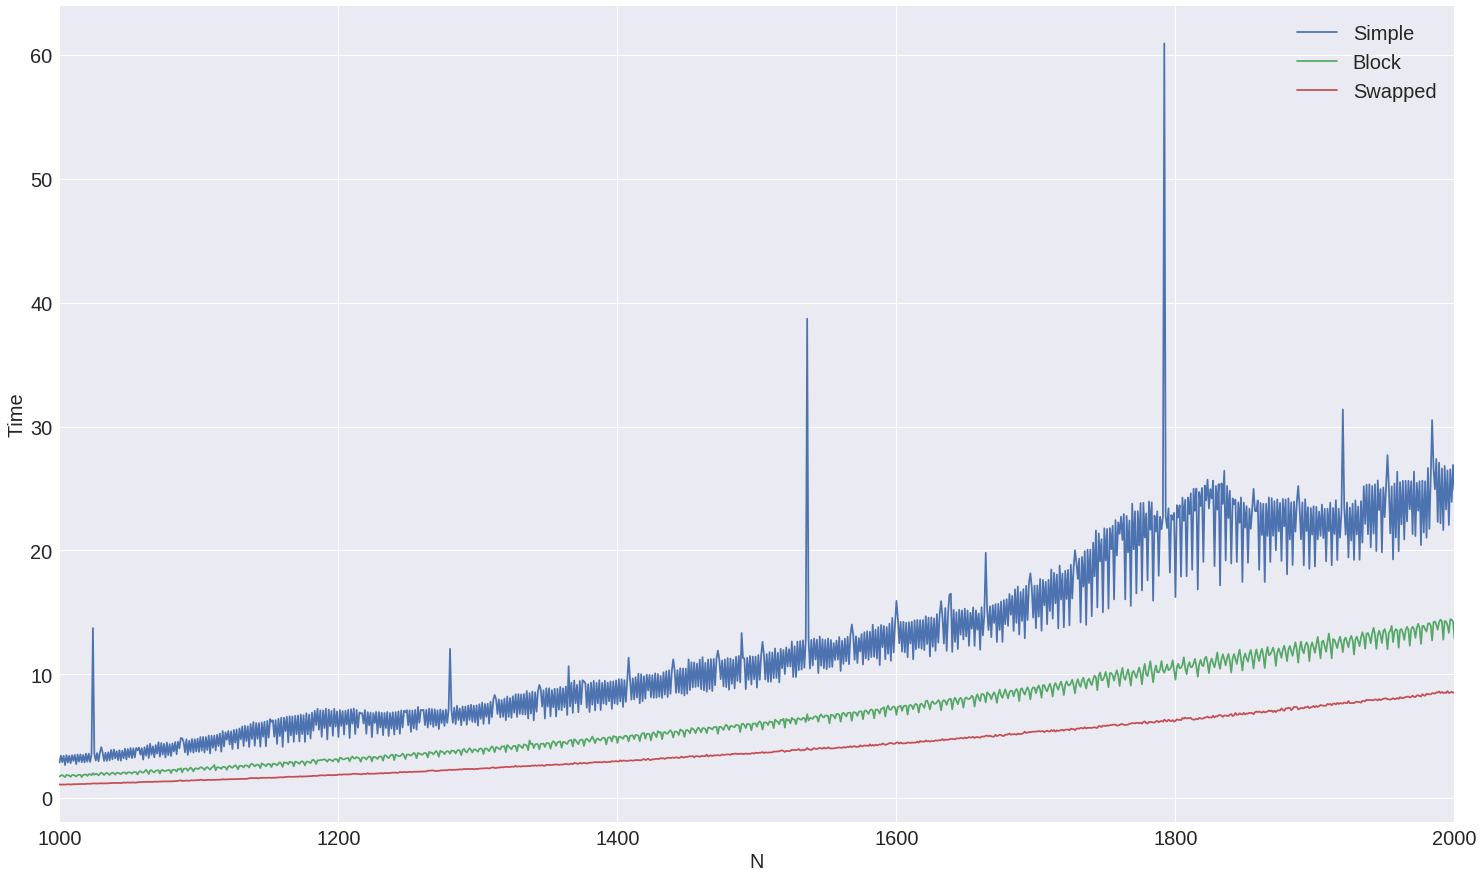

In [11]:
_, ax = plt.subplots(figsize=(25, 15))
df_double.plot(ax=ax)
ax.set_xlabel('N')
ax.set_ylabel('Time')

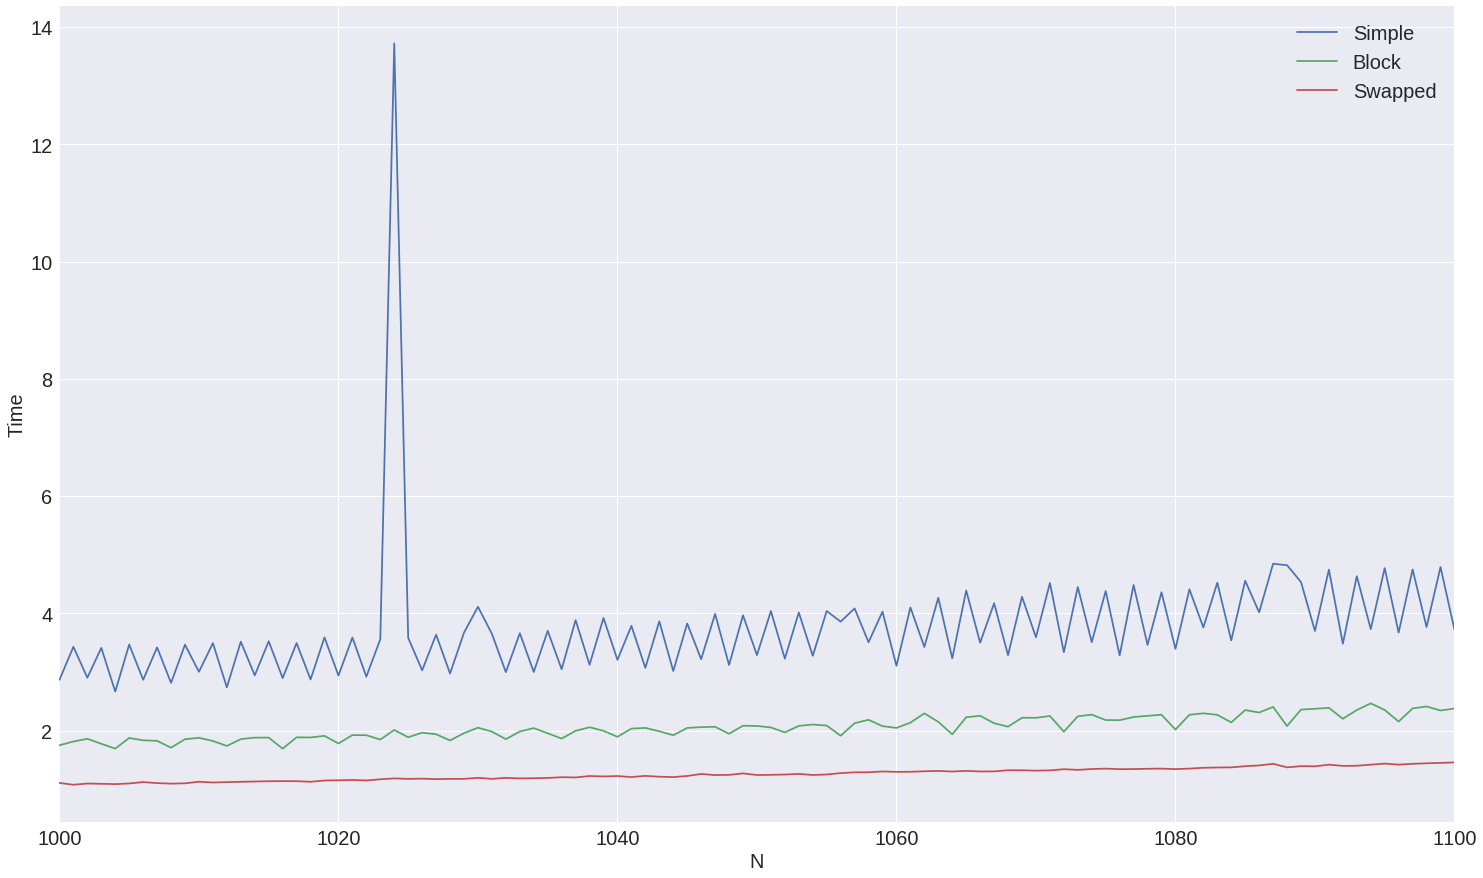

In [22]:
_, ax = plt.subplots(figsize=(25, 15))
df_double[:101].plot(ax=ax)
ax.set_xlabel('N')
ax.set_ylabel('Time')

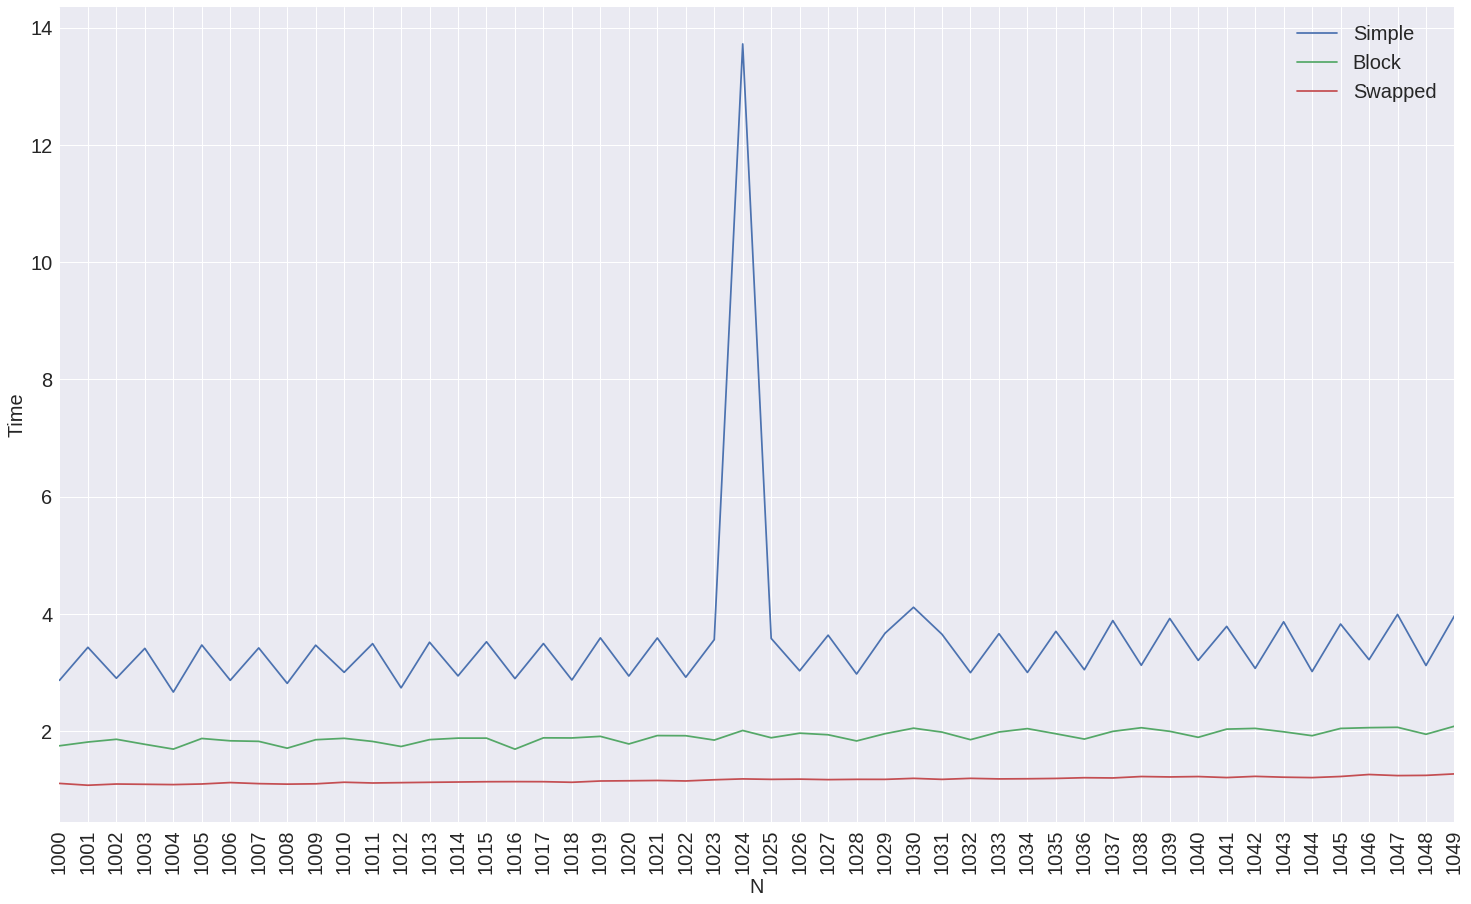

In [23]:
_, ax = plt.subplots(figsize=(25, 15))
df_double[:50].plot(ax=ax)
ax.set_xlabel('N')
ax.set_ylabel('Time')
ax.set_xticks(df_float[:50].index.values)
ax.set_xticklabels(df_float[:50].index.values, rotation=90)

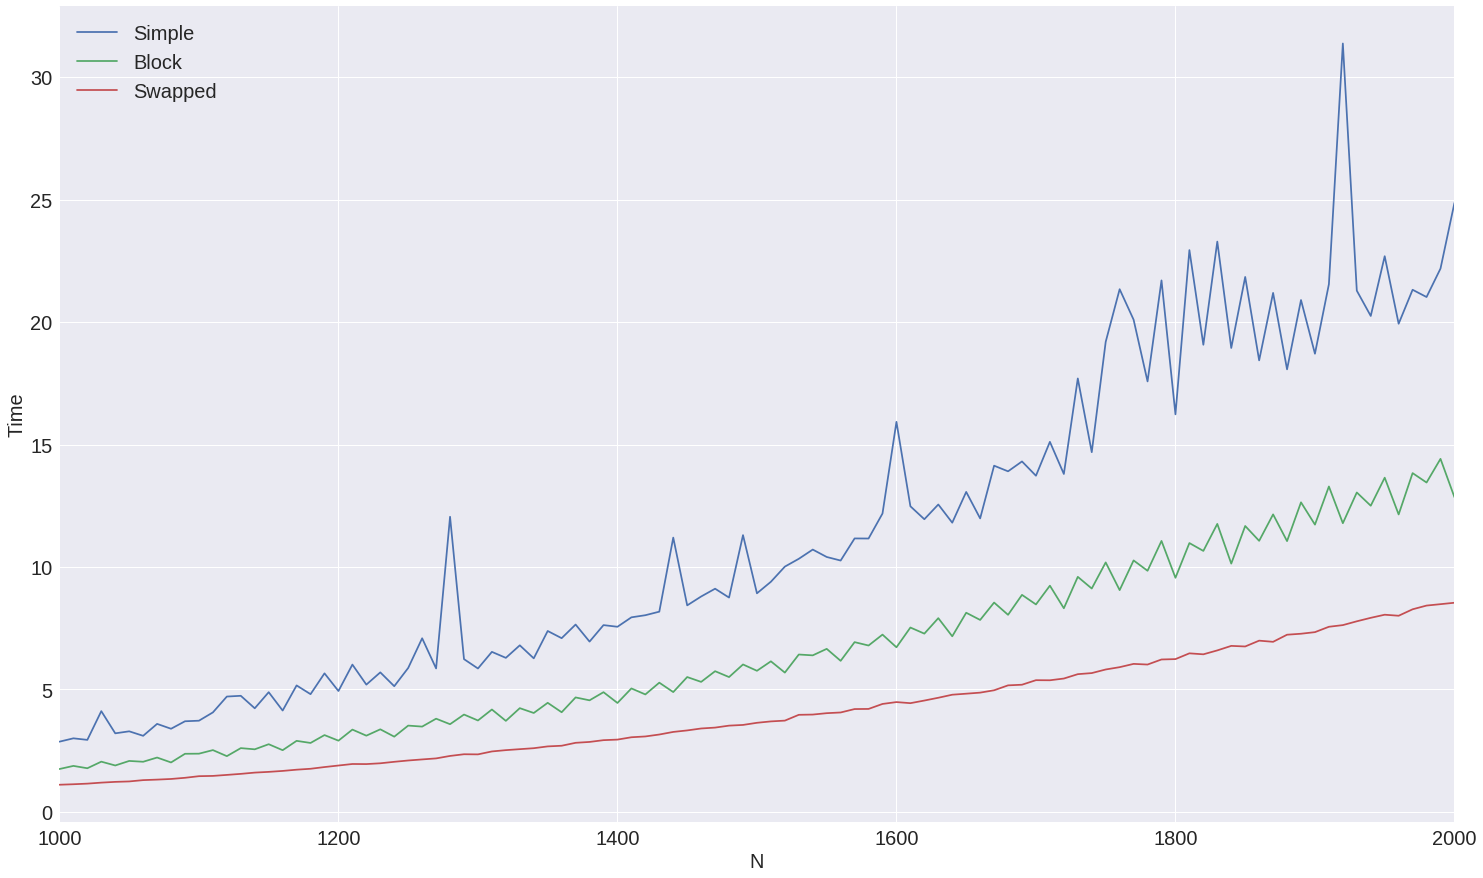

In [24]:
_, ax = plt.subplots(figsize=(25, 15))
df_double[::10].plot(ax=ax)
ax.set_xlabel('N')
ax.set_ylabel('Time')